  

  <span style="color: black; font-family: Babas; font-size: 2em;">Reinforcement Learning Series</span>
  
  <span style="color: black; font-family: Garamond; font-size: 1.3em;">Chi-Town Machine Learning Meetup</span>
  
  
  <p><img src= "demo_images/RL_images/maze.gif",style=border:0px;margin:0px;float:left;width:400px;> 
  </p>
  <p> <br></p>

<p>
<img src= "demo_images/RL_images/looping_pacman.gif",style=border:0px;margin:0px;float:left;width:400px;> 
  </p>


<p> <br><br><br><br><br></p>

<p>
  <img src="demo_images/RL_images/lunar_lander.gif",style=border:0px;margin:30px;float:left;width:400px;> 
    </p>

<p>  
 <img src="demo_images/RL_images/chess.gif",style=border:0px;margin:20px;float:left;width:300px;> 
  </p>




  

  <span style="color: black; font-family: Babas; font-size: 2em;">Reinforcement Learning Series</span>
  
  <span style="color: black; font-family: Garamond; font-size: 1.3em;">Chi-Town Machine Learning Meetup</span>
  
  






  

  <span style="color: black; font-family: Babas; font-size: 2em;">Reinforcement Learning Series</span>
  
  <span style="color: black; font-family: Garamond; font-size: 1.3em;">Part 3: Large state spaces and function approximators</span>
  
  
 <p> <img src= "demo_images/RL_images/cartpole.gif",style=border:0px;margin:0px;float:center;width:700px;> 
  
</p>



# What this presentation is all about

## What this presentation is about

- Problems with huge state spaces

- The absolute need for *function approximators*

- Big picture overview of function approximation

- Intuition for injecting function approximators into our Q-Learning framework

# Dealing with large state spaces

## Dealing with large state spaces

- With the chess example: the number of possible configurations of chess pieces on the board is enormous - i.e., the number of states or size of state space - is on the order of $10^{120}$.  That is far larger than the number of atoms in the known universe!

- With the cart-pole example: each of the four descriptors of the environment is continuous (or finely discretized in practice) - thus the number of states is - technically speaking - infinite.  

- With the Pac-man example: if we use raw pixels as input then one state is a single frame of the game, and we have as many states as there are ways to legally arrange pixels in the game.  This is an extremely large number.  

With such RL problems the **huge number of states** makes directly computing and storing the $Q$ function/matrix impossible.

Recall our Q-Learning algo so far - with all the trimmings...

### Q -Learning pseudo-code

<hr style="height:1px;border:none;color:#555;background-color:#555;">
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; initialize $Q$<br>
<strong>2:</strong>&nbsp;&nbsp; set the number of episodes $E$<br>
<strong>3:</strong>&nbsp;&nbsp; set the maximum number of steps per episode $T$<br>
<strong>4:</strong>&nbsp;&nbsp; set the exploration-exploitation probability $p\in[0,1]$<br>
<strong>5:</strong>&nbsp;&nbsp; set the short-term long-term reward trade-off $\gamma\in[0,1]$<br>

<strong>6:</strong>&nbsp;&nbsp; <code>for</code> $e$ = $1$, $2$, ..., $E$<br>
<strong>7:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow 1$<br>
<strong>8:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select a random initial state $s_1$<br>
<strong>9:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>while</code> goal state not reached <code>and</code> $k \leq T$<br>
<strong>10:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;choose a random number $r$ uniformly from the unit interval $[0,1]$<br>

<strong>11:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>if</code> $r<p$<br>

<strong>12:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select a valid action $a_k$ at random<br>

<strong>13:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>else</code><br>

<strong>14:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;select the valid action $a_k$ that maximizes $Q\left(s_{k},\,a_{k}\right)$<br>

<strong>15:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<code>end if</code><br>

<strong>16:</strong>&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;record the resulting state $s_{k+1}$ and corresponding reward $r_k$<br>
<strong>17:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q\left(s_{k},\,a_{k}\right) \longleftarrow r_{k}+\gamma\cdot\underset{i\in\varOmega(s_{k+1})}{\text{maximum}}\,\,Q\left(s_{k+1},\,\alpha_{i}\right)$<br>
<strong>18:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \longleftarrow k+1$<br>
<strong>19:</strong>&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;<code>end while</code><br>
<strong>20:</strong>&nbsp; <code>end for</code><br>
<hr style="height:1px;border:none;color:#555;background-color:#555;">
</p>


## The problem

- With a huge state-space we now have a serious problem recording / updating $\,\,Q\left(s_{k},\,a_{k}\right)$

- Thus far have been thinking about / computing $Q$ as a **table of values**

## e.g., for simple grid world

In [1]:
# import gridworld library - make sure this is executed prior to running any gridworld cell
import sys
sys.path.append('demo_python_backend_files')

# import custom gridworld simulator, qlearning module, and animation suite
from gridworld_lib import gridworld_enviro
from gridworld_lib import gridworld_qlearn
from gridworld_lib import gridworld_animators

# generate instance of gridworld, instance of q-learner, then print out Q function for visual examination
small_maze = gridworld_enviro.environment(world_size = 'small', world_type = 'maze')

# create an instance of the q-learner
qlearner = gridworld_qlearn.learner(gridworld = small_maze)

# run q-learning
qlearner.train(verbose = False, action_method = 'exploit')

# pull states and Q matrix for plotting
states = small_maze.states 

q-learning algorithm complete


## e.g., for simple grid world

In [2]:
# print out Q matrix
import pandas as pd
df = pd.DataFrame(qlearner.Q,columns=['down','up','left','right'], index=small_maze.states)
print df.round(3)   

        down     up   left  right
0,0   -427.0 -227.0 -427.0 -227.0
0,1   -227.0  -27.0 -427.0 -226.0
0,2   -226.0  -26.0 -227.0 -225.0
0,3   -225.0  -25.0 -226.0 -224.0
0,4   -224.0  -24.0 -225.0 -223.0
0,5   -223.0  -23.0 -224.0 -222.0
0,6   -222.0  -22.0 -223.0 -221.0
0,7   -221.0  -21.0 -222.0 -220.0
0,8   -220.0  -20.0 -221.0 -219.0
0,9   -219.0  -19.0 -220.0 -218.0
0,10  -218.0  -18.0 -219.0 -217.0
0,11  -217.0  -17.0 -218.0 -417.0
0,12  -417.0 -217.0 -217.0 -417.0
1,0   -427.0 -228.0 -227.0  -27.0
1,1   -227.0  -28.0 -227.0  -26.0
1,2   -226.0 -226.0  -27.0  -25.0
1,3   -225.0 -225.0  -26.0  -24.0
1,4   -224.0 -224.0  -25.0  -23.0
1,5   -223.0 -223.0  -24.0  -22.0
1,6   -222.0 -222.0  -23.0  -21.0
1,7   -221.0 -221.0  -22.0  -20.0
1,8   -220.0 -220.0  -21.0  -19.0
1,9   -219.0  -20.0  -20.0  -18.0
1,10  -218.0 -216.0  -19.0  -17.0
1,11  -217.0  -16.0  -18.0 -217.0
1,12  -417.0 -216.0  -17.0 -217.0
2,0   -227.0 -229.0 -228.0  -28.0
2,1    -27.0  -29.0 -228.0 -226.0
2,2    -26.0 -

## e.g., for simple grid world

- In other words, Q here is a set of 4 *mathematical functions* --> one for each *possible action*

- With Q-Learning so far, we have been computing the raw *tabular-version of these functions*

- Lets plot em

## e.g., for simple grid world

<IPython.core.display.Javascript object>


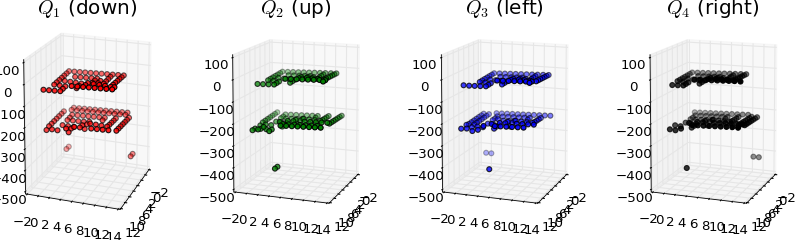

In [3]:
# create instance of gridworld animator and plot
%matplotlib notebook
animator = gridworld_animators.animator()
animator.show_Qfunc_in_3d(world = small_maze,learner = qlearner)

## e.g., for simple grid world

<IPython.core.display.Javascript object>


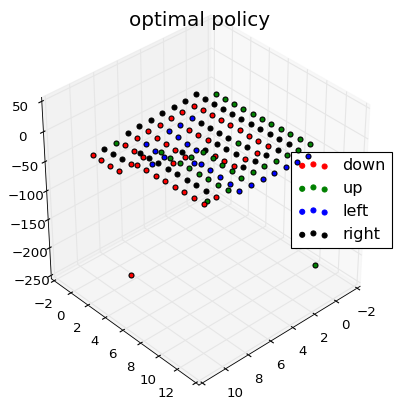

<IPython.core.display.Javascript object>


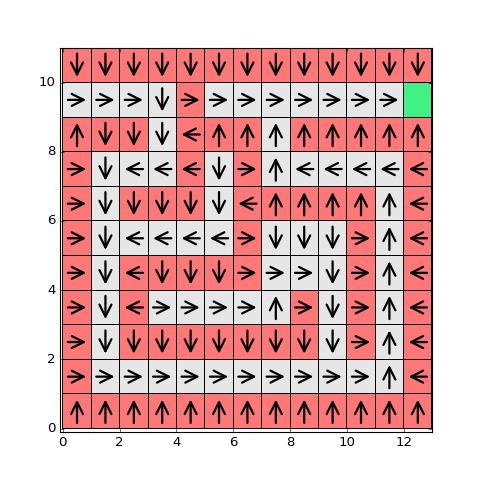

In [2]:
# create instance of gridworld animator and plot
%matplotlib notebook
animator = gridworld_animators.animator()
animator.show_optimal_policy_in_3d(world = small_maze,learner = qlearner)

##  Q as a set of functions

- In general, Q a set of *mathematical functions* --> one for each *possible action*

- So far we could view the *tabular version* of each *mathematical function* of $Q$

- But for RL problems with very large state spaces we can't store / compute with such versions

- We will need to view each function as an *equation* --> function approximator

# Function approximation

## Two views of a mathematical function

- Viewed as *equation* e.g., $$ y = w_0 + w_1x$$

- Viewed as a *table of values* (for $w_0 = 3$, $w_1 = -2$)

$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (y = 3 -2 x) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

- The **equation view** e.g., $$ y = w_0 + w_1x + w_2x^2$$

- The **table view** (for $w_0 = 3,\, w_1 = -2, \, w_3 = 5$)

$$\begin{array}{c|c}
~~ \text{Input} ~(x) & \text{Output}  ~~ (y = 3 -2 x + 5x^2) \\
\hline 0 & 3 \\
\ -0.4 & 4.6 \\
\ 5.2 & 127.8 \\
\vdots & \vdots\\
\end{array}$$

## We can plot a table of values (not an equation)

<IPython.core.display.Javascript object>


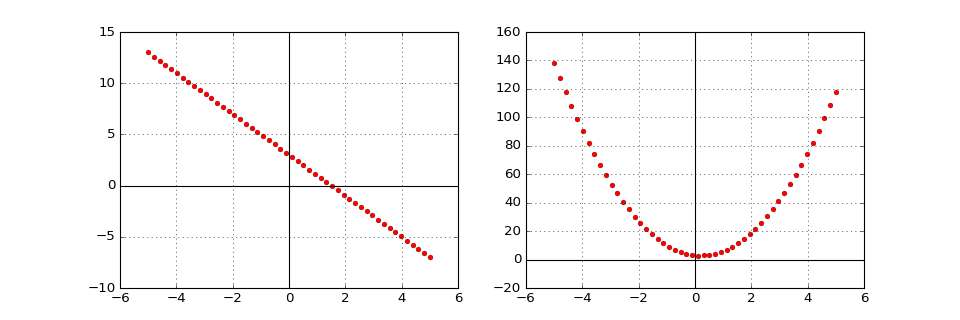

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# generate a simple table of values to plot
x = np.linspace(-5,5,50)                  # range of input for our functions

# generate line table
w_0 = 3
w_1 = -2
y = w_0 + w_1*x
line_table = np.stack((x,y),axis = 1)  # make table of values for our function

# parabola table
w_0 = 3
w_1 = -2
w_2 = 5
y = w_0 + w_1*x + w_2*x**2
parabola_table = np.stack((x,y),axis = 1)    # make table of values for our function

# plot these elementary functions 
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122); 
ax1.scatter(line_table[:,0],line_table[:,1],c = 'r',linewidth = 0.2)
ax2.scatter(parabola_table[:,0],parabola_table[:,1],c = 'r',linewidth = 0.2)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax1.grid(True, which='both'),ax2.grid(True, which='both')
ax1.axhline(y=0, color='k'),ax2.axhline(y=0, color='k')
ax1.axvline(x=0, color='k'),ax2.axvline(x=0, color='k')

plt.show()

## Which view is more powerful?

- if we had only *one* - the equation or table of values - which would be better?

- *The equation*: it can be used to generate the table of values

- e.g., 
$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (y = 3 -2 x) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

## Which view is more powerful?

- if we have a table of values --> can we find an equation?

- Note: table of values (with no known equation) defines a mathematical function

e.g., 


$$\begin{array}{c|c}
~~ \text{Input} ~ (x) &  ~~ \text{Output} ~~ (y) \\
\hline 0 & 3 \\
\ -0.4 & 3.8 \\
\ 5.2 & -7.2 \\
\vdots & \vdots\\
\end{array}$$

## Which view is more powerful?

- if we have a table of values --> can we find an equation?

- can we just 'eye-ball' the equation by plotting the table of values? 

<IPython.core.display.Javascript object>


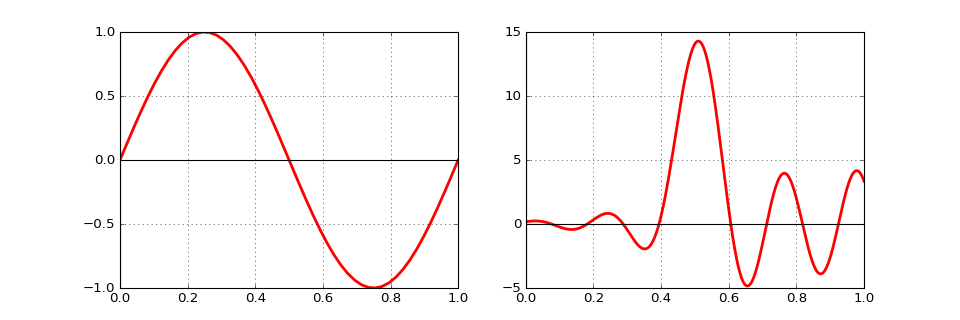

In [12]:
# generate a simple table of values to plot
x = np.linspace(0,1,50)                  # range of input for our functions
wave = np.sin(2*np.pi*x)
wave_table = np.stack((x,wave),axis=1)    # make table of values for our function

# load in a toughy to plot
guess_this_table = np.loadtxt('guess_this.txt',delimiter=',')

# plot these elementary functions 
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122); 
ax1.plot(wave_table[:,0],wave_table[:,1],c = 'r',linewidth = 2.5)
ax2.plot(guess_this_table[:,0],guess_this_table[:,1],c = 'r',linewidth = 2.5)

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
ax1.grid(True, which='both'),ax2.grid(True, which='both')
ax1.axhline(y=0, color='k'),ax2.axhline(y=0, color='k')
ax1.axvline(x=0, color='k'),ax2.axvline(x=0, color='k')

plt.show()

## Which view is more powerful?

- if we have a table of values --> can we find an equation?

- can we just 'eye-ball' the equation by plotting the table of values? 

- One on the left: $$y=\text{sin}(2\pi x)$$

- One on the right

$$y = e^{3x}\frac{\text{sin}(3\pi (x-0.5))}{3{\pi}^2(x-0.5)}$$


## Which view is more powerful?

- if we have a table of values --> can we find an equation?

- can we just 'eye-ball' the equation by plotting the table of values? 

- NO: tables often represent complex functions

- NO: can't plot most anyway, too high dimensional (too many inputs)

- So can't guess by visualizing, but we can use *function approximators*

## What does this have to do with machine learning?

> In terms of our 'two views of functions', the aim of supervised learning is to recover the equation of a function based on *noisy* samples of its table of values.

<img src="demo_images/regr_to_func_approx.gif\" width=300 height=300/>

## What does this have to do with machine learning?

> In terms of our 'two views of functions', the aim of supervised learning is to recover the equation of a function based on *noisy* samples of its table of values.

<img src="demo_images/class_to_func_approx_2d_slow.gif\" width=350 height=300/>

<img src="demo_images/class_to_func_approx_3d.gif\" width=400 height=300/>

## Function approximators

- catalogs of simple mathematical functions with known equations

- combine and tune these equations to match a table of values using a cost function (e.g., least squares)

- their combination gives an equation for the table values

## Function approximators

- most relevant for us going forward are neural networks - a catalog or 'basis' of functions of similar type

- Consist of compositions of elementary (equation) functions

- e.g., composition of a line and the hyperbolic tangent function

$$f(x)=\text{tanh}(w_0+w_1x)$$

- Use many of these --> each with their own weights -->  'single hidden layer' network

## Function approximators

In [16]:
# import class for visualizing complete function approximation
import sys
sys.path.append('demo_python_backend_files')

from super_viz_lib import RegressionFit
func_fit = RegressionFit.RegressionFit()
func_fit.load_target('demo_datasets/sin_function.csv')
func_fit.browse_fit(model_choice = 'nnet',param_range=np.arange(1,10))

ImportError: cannot import name mean_variance_axis

## What can we do?

- instead of storing entire column, pick flexible parameterized function and compactly represent (e.g., line, polynomial, neural network, trees)

- $h_1(s)$ for first column, $h_2(s)$ for second, etc.,...,$h_M(s)$ for final column

## Example: cart-pole

In [1]:
from my_cartpole import my_cartpole
cartpole_test = my_cartpole()
cartpole_test.qlearn(gamma=0.8,num_episodes = 100)

[2017-04-06 18:16:47,683] Making new env: CartPole-v0


q-learning process complete, best number of average steps in test runs = 199.0


In [2]:
# run a few test runs of cart-pole using the trained function approximators
cartpole_test.animate_test_run()
cartpole_test.animate_test_run()

lasted 199 timesteps
lasted 199 timesteps


## How does this adjust Q-Learning algorithm?

- Thats where we pick up next time!

<a id='bib_cell'></a>

## Notes and bibliography

[0] Harmon, Mance E., and Stephanie S. Harmon. Reinforcement Learning: A Tutorial. No. WL-TR-97-1028. WRIGHT LAB WRIGHT-PATTERSON AFB OH, 1997

[1]  There are many algorithms specifically designed to solve just this task - the most popular being [Dijkstra’s and A\* algorithms](http://www.redblobgames.com/pathfinding/a-star/introduction.html).  However the more flexible RL framework too provides great results.

[2] Lai, Matthew. "Giraffe: Using deep reinforcement learning to play chess." arXiv preprint arXiv:1509.01549 (2015).
APA	

[3]  Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013).
    
[4]  Image taken from http://ai.berkeley.edu/project_overview.html

[5] Watkins, Christopher JCH, and Peter Dayan. "Q-learning." Machine learning 8.3-4 (1992): 279-292.

[6]  Image taken from https://gym.openai.com/